# Setup

In [2]:
!pip install mplfinance
!pip install pandas_ta
import mplfinance as mpf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from datetime import datetime, timedelta
import time
import plotly.graph_objects as go
import math
from sklearn.metrics import classification_report
yf.pdr_override()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=c1a6e959bd0cefb7aaa79deca29d23a213ebe7ce3a0b2e005577a7fc5bb27471
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Raw Data Collection

In [3]:
end_date = datetime.today() - timedelta(days=55)

In [4]:
# Create a datetime.date object
end_date_object = datetime.today()
start_date_object = end_date

# Convert the date object to a string in the desired format
start_date_string = start_date_object.strftime("%Y-%m-%d")
end_date_string = end_date_object.strftime("%Y-%m-%d")

# Print the resulting string
print(start_date_string)
print(end_date_string)

2023-09-18
2023-11-12


In [5]:
# Apple- Large Stock - Different Timeframes
df_apple_stocks_daily = pdr.get_data_yahoo("AAPL", start="2013-05-07", end="2023-08-30") #last 10 years
df_apple_stocks_hourly = pdr.get_data_yahoo("AAPL", start="2022-05-07", end="2023-08-30", interval="1h") #last 1 year
df_apple_stocks_15_min = pdr.get_data_yahoo("AAPL", start=start_date_string, end=end_date_string, interval="15m") #last 55 days
df_apple_stocks_5_min = pdr.get_data_yahoo("AAPL", start=start_date_string, end=end_date_string, interval="5m") #last 55 days

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
#Redfin -Small Stock-Different Timeframes - 4
df_red_stocks_daily = pdr.get_data_yahoo("RDFN", start="2013-05-07", end="2023-08-30") #last 10 years
df_red_stocks_hourly = pdr.get_data_yahoo("RDFN", start="2022-05-07", end="2023-08-30", interval="1h") #last 1 year
df_redstocks_15_min = pdr.get_data_yahoo("RDFN", start=start_date_string, end=end_date_string, interval="15m") #last 55 days
df_red_stocks_5_min = pdr.get_data_yahoo("RDFN", start=start_date_string, end=end_date_string, interval="5m") #last 55 days

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
#Currency EURUSD=X for 4 different timeframes
df_currency_daily = pdr.get_data_yahoo("EURUSD=X", start="2013-05-07", end="2023-08-30")
df_currency_hourly = pdr.get_data_yahoo("EURUSD=X", start="2022-05-07", end="2023-08-30",interval = "1h")
df_currency_15_min = pdr.get_data_yahoo("EURUSD=X", start=start_date_string, end=end_date_string,interval = "15m")
df_currency_5_min = pdr.get_data_yahoo("EURUSD=X", start=start_date_string, end=end_date_string,interval = "5m")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
#Currency CADUSD=X for 4 different timeframes
df_currency2_daily = pdr.get_data_yahoo("CADUSD=X", start="2013-05-07", end="2023-08-30")
df_currency2_hourly = pdr.get_data_yahoo("CADUSD=X", start="2022-05-07", end="2023-08-30",interval = "1h")
df_currency2_15_min = pdr.get_data_yahoo("CADUSD=X", start=start_date_string, end=end_date_string,interval = "15m")
df_currency2_5_min = pdr.get_data_yahoo("CADUSD=X", start=start_date_string, end=end_date_string,interval = "5m")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
#Cryptocurrency for 4 different time frames
cryptocurrency = "BTC-USD"
df_crypto_daily = pdr.get_data_yahoo(cryptocurrency, start="2013-05-07", end="2023-08-30", interval="1d")
df_crypto_hourly = pdr.get_data_yahoo(cryptocurrency, start="2022-05-07", end="2023-08-30", interval="1h")
df_crypto_15_min = pdr.get_data_yahoo(cryptocurrency, start=start_date_string, end=end_date_string,interval = "15m")
df_crypto_5_min = pdr.get_data_yahoo(cryptocurrency, start=start_date_string, end=end_date_string,interval = "5m")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [10]:
# Ticker symbol for Multiverse X - small stock
cryptocurrency2 = "SAND"
df_crypto2_daily = pdr.get_data_yahoo(cryptocurrency2, start="2013-05-07", end="2023-08-30", interval="1d")
df_crypto2_hourly = pdr.get_data_yahoo(cryptocurrency2, start="2022-05-07", end="2023-08-30", interval="1h")
df_crypto2_15_min = pdr.get_data_yahoo(cryptocurrency2, start=start_date_string, end=end_date_string,interval = "15m")
df_crypto2_5_min = pdr.get_data_yahoo(cryptocurrency2, start=start_date_string, end=end_date_string,interval = "5m")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# Target Variables Extraction

In [ ]:
# MAJOR-REVERSAL
def get_maxs(points):
   maxs_index = []
   maxs_value = []
   if len(points) > 2:
     for i in range(1,len(points)-1):
        if points[i] > points[i-1] and points[i] > points[i+1]:
          maxs_index.append(i)
          maxs_value.append(points[i])
   return maxs_index,maxs_value

def get_mins(points,maxs):
    mins = []
    ranges = maxs
    for i in range(len(maxs)-1):
      idxmin_loc = points.iloc[ranges[i]+1:ranges[i+1]].idxmin()
      idx_loc = points.index.get_loc(idxmin_loc)
      mins.append(idx_loc)
    return mins

def get_major_reversals(high_points,low_points):
    maxs_index,maxs_value = get_maxs(high_points)
    max_maxs_index,maxs_value = get_maxs(maxs_value)
    maxs_index = [maxs_index[i] for i in max_maxs_index]
    mins_index = get_mins(low_points,maxs_index)
    return high_points.index[mins_index],high_points.index[maxs_index]

# MINOR-REVERSAL
def before_up_mask(points,avg_candle,factor_1 = 0.9, factor_2 = 0.1):
   return ~( ((points) >= (points.shift(1) + (avg_candle * factor_1)))
          | ( (points.shift(1) < (points - avg_candle * factor_2)) &  (points < (points.shift(-1) - avg_candle * factor_2)) ) )
def next_up_mask(points,avg_candle,factor_1 = 0.9, factor_2 = 0.1):
   return   ( ((points.shift(-1)) >= (points + (avg_candle * factor_1)))
              | ( (points < (points.shift(-1) - avg_candle * factor_2)) &  (points.shift(-1) < (points.shift(-2) - avg_candle * factor_2)) ) )
def is_up(points,avg_candle,factor_1 = 0.9, factor_2 = 0.1):
   return next_up_mask(points,avg_candle) & before_up_mask(points,avg_candle)
def before_down_mask(points,avg_candle,factor_1 = 0.9, factor_2 = 0.1):
   return ~( ((points) <= (points.shift(1) - (avg_candle * factor_1)))
          | ( (points.shift(1) > (points + avg_candle * factor_2)) &  (points > (points.shift(-1) + avg_candle * factor_2)) ) )
def next_down_mask(points,avg_candle,factor_1 = 0.9, factor_2 = 0.1):
   return   ( ((points.shift(-1)) <= (points - (avg_candle * factor_1)))
              | ( (points > (points.shift(-1) + avg_candle * factor_2)) &  (points.shift(-1) > (points.shift(-2) + avg_candle * factor_2)) ) )
def is_down(points,avg_candle):
   return next_down_mask(points,avg_candle) & before_down_mask(points,avg_candle)
def is_steady(high_points,low_points,avg_candle):
  return ~next_up_mask(low_points,avg_candle) & ~next_down_mask(high_points,avg_candle)

def get_minor_reversals(high_points,low_points):
    avg_candle = (high_points - low_points).rolling(window=14).mean()
    down_reversal = high_points[is_down(high_points,avg_candle)].index
    up_reversal = low_points[is_up(low_points,avg_candle)].index
    mask = is_steady(high_points,low_points,avg_candle)
    steady = low_points[mask & ~mask.shift(1).fillna(True)].index
    return up_reversal, down_reversal, steady

# TREND-SHIFT
def find_outliers(chunk, q1 = 0.4, q2 = 0.6):
    Q1 = chunk.quantile(q1)
    Q3 = chunk.quantile(q2)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return chunk[(chunk < lower_bound) | (chunk > upper_bound)]
def get_trend_shift(high_points,low_points):
     avg_hl = (low_points + high_points) / 2
     trend_angle_diff = avg_hl.diff(periods = -1).apply(lambda x: math.degrees(math.atan(x))).diff()
     chunk_size = 200
     trend_angle_diff = trend_angle_diff.reset_index(drop = True)
     group_key = trend_angle_diff.index // chunk_size
     trend_shift = trend_angle_diff.groupby(group_key).apply(find_outliers).reset_index(level=0, drop=True)
     return high_points.index[trend_shift.index]

# Major_Trend (categorical): -1,0,1
def get_major_trend(mins_index,maxs_index,original_idx_list,len_df):
    idx_list = np.insert(original_idx_list, 0, -1, axis=0)
    idx_list = np.append(idx_list, len_df)
    trend_array = np.zeros(len_df)
    trend = -1 if min(mins_index) < min(maxs_index) else 1
    for i in range(len(idx_list)-1):
        trend_array[idx_list[i]+1:idx_list[i+1]] = trend
        trend *= -1
    return trend_array

# Visualize and inspect cause it is not really good
def get_fractals(high , low, period) :
    periods = [p for p in range(-period, period + 1) if p != 0]

    highs = [high > high.shift(p) for p in periods]
    bears = pd.Series(np.logical_and.reduce(highs), index=high.index)
    bears_index = bears[bears == True].index

    lows = [low < low.shift(p) for p in periods]
    bulls = pd.Series(np.logical_and.reduce(lows), index=high.index)
    bulls_index = bulls[bulls == True].index

    return bears_index, bulls_index

# Number of candles before next major reversal (discrete): 0 to inf
# Change before next major reversal (continuous): 0 to inf
def get_Metrics_Before_Next_Major_Reversal(points,original_idx_list,len_df):
    change_array = np.array([], dtype=int)
    nCandles_array = np.array([], dtype=int)
    prev_reversal = 0
    for reversal in original_idx_list:
        num_points = reversal - prev_reversal
        nCandles_array = np.concatenate((nCandles_array, np.arange(num_points, 0, -1)))
        partition = points.iloc[prev_reversal:reversal]
        change_array = np.concatenate((change_array, ((partition * -1) + points.iloc[reversal]) / partition))
        prev_reversal = reversal
    nCandles_array = np.concatenate((nCandles_array, np.full(len_df - reversal, np.nan)))
    change_array = np.concatenate((change_array, np.full(len_df - reversal, np.nan)))
    return nCandles_array, change_array

def add_labels(df):
    # Major_Reversal_Type_HL: 0,1,2
    mins_index_hl,maxs_index_hl = get_major_reversals(df.High,df.Low)
    df["Major_Reversal_Type_HL"] = 0
    df["Major_Reversal_Type_HL"][mins_index_hl] = 1
    df["Major_Reversal_Type_HL"][maxs_index_hl] = 2
    # Major_Reversal_Type_Open: 0,1,2
    mins_index_open,maxs_index_open = get_major_reversals(df.Open,df.Open)
    df["Major_Reversal_Type_Open"] = 0
    df["Major_Reversal_Type_Open"][mins_index_open] = 1
    df["Major_Reversal_Type_Open"][maxs_index_open] = 2
    # Next_Major_Reversal_Type: 0,1,2
    df["Next_Major_Reversal_Type_Open"] = df["Major_Reversal_Type_Open"].shift(-1)
    # Previous_Major_Reversal_Type: 0,1,2
    df["Previous_Major_Reversal_Type_Open"] = df["Major_Reversal_Type_Open"].shift(1)
    # is_Fractal_HL_2: 0,1,2
    max_fractals_HL_2_index, min_fractals_HL_2_index = get_fractals(df.High,df.Low,2)
    df["is_Fractal_HL_2"] = 0
    df["is_Fractal_HL_2"][min_fractals_HL_2_index] = 1
    df["is_Fractal_HL_2"][max_fractals_HL_2_index] = 2
    # is_Fractal_Open_3: 0,1,2
    max_fractals_O_3_index, min_fractals_O_3_index = get_fractals(df.Open,df.Open,3)
    df["is_Fractal_Open_3"] = 0
    df["is_Fractal_Open_3"][min_fractals_O_3_index] = 1
    df["is_Fractal_Open_3"][max_fractals_O_3_index] = 2
    # Major_Trend (categorical): 0,1,2
    original_idx_list = np.sort(np.concatenate([np.where(df.index.isin(mins_index_open))[0], np.where(df.index.isin(maxs_index_open))[0]]))
    df['Major_Trend'] = get_major_trend(mins_index_open,maxs_index_open,original_idx_list,len(df))
    # Next_Major_Trend (categorical):0,1,2
    df["Next_Major_Trend"] = df["Major_Trend"].shift(-1, axis = 0)
    # Previous_Major_Trend (categorical): 0,1,2
    df["Previous_Major_Trend"] = df["Major_Trend"].shift(1, axis = 0)
    # Number of candles before next major reversal (discrete): 0 to inf
    # Change before next major reversal (continuous): 0 to inf
    nCandles_array, change_array = get_Metrics_Before_Next_Major_Reversal(df.Open,original_idx_list,len(df))
    df["nCandles_Before_Major_Reversal"] = nCandles_array
    df["Change_Before_Major_Reversal"] = change_array
    # Minor_Reversal_Type
    up_reversal, down_reversal, steady = get_minor_reversals(df.High,df.Low)
    df["Minor_Reversal_Type"] = 0
    df["Minor_Reversal_Type"][up_reversal] = 1
    df["Minor_Reversal_Type"][down_reversal] = 2
    df["Minor_Reversal_Type"][steady] = 3
    # Trend_Shift
    trend_shift = get_trend_shift(df.High,df.High)
    df["is_Trend_Shift"] = 0
    df["is_Trend_Shift"][trend_shift] = 1

# Feature extraction

In [ ]:
def add_moving_averages(df):
    # the first 20 records will have null values so we will have to preprocess the datasets for missing values.

    # moving average for last 5, 10, 15, and 20 records
    df['MA_5'] = df['Close'].rolling(window=5).mean()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['MA_15'] = df['Close'].rolling(window=15).mean()
    df['MA_20'] = df['Close'].rolling(window=20).mean()

    # weighted moving average for last 5 records
    weights = np.arange(1, 6)
    df['WMA_5'] = df['Close'].rolling(window=5).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

    # linear regression moving average for last 5 records
    def lrma(values):
        y = values
        x = np.arange(len(values))
        model = LinearRegression().fit(x.reshape(-1, 1), y)
        return model.predict(np.array([[len(values)-1]]))[0]
    df['LRMA_5'] = df['Close'].rolling(window=5).apply(lrma, raw=True)

    # triple exponential (better than normal and double to reduce lag) moving average for last 5 records
    def tema(values):
        ema1 = values.ewm(span=5, adjust=False).mean()
        ema2 = ema1.ewm(span=5, adjust=False).mean()
        ema3 = ema2.ewm(span=5, adjust=False).mean()
        return 3 * ema1 - 3 * ema2 + ema3
    df['TEMA_5'] = df['Close'].rolling(window=5).apply(lambda x: tema(pd.Series(x)).iloc[-1], raw=True)
    # adding candle distances
    df['Close_Open_Distance'] = df['Close'] - df['Open']
    df['High_Low_Distance'] = df['High'] - df['Low']
    for ma in ['MA_5', 'MA_10', 'MA_15', 'MA_20']:
        df[f'Close_to_{ma}'] = df['Close'] - df[ma]
        df[f'Open_to_{ma}'] = df['Open'] - df[ma]
        df[f'High_to_{ma}'] = df['High'] - df[ma]
        df[f'Low_to_{ma}'] = df['Low'] - df[ma]

    return df

In [ ]:
df_apple_stocks_daily = add_moving_averages(df_apple_stocks_daily)
df_crypto2_daily = add_moving_averages(df_crypto2_daily)
df_currency_hourly = add_moving_averages(df_currency_hourly)
df_apple_stocks_5_min = add_moving_averages(df_apple_stocks_5_min)

In [ ]:
def preprocess_data(df):
    df = df.dropna()
    df = df.drop_duplicates()
    if isinstance(df.index, pd.DatetimeIndex):
        df = df.sort_index()
    df = df[df['Close'] != 0]
    df = df[df['Open'] != 0]
    return df


In [ ]:
import pandas_ta as ta

def add_technical_indicators_with_actions(df):


    df['AO'] = ta.ao(df['High'], df['Low'])
    df['APO'] = ta.apo(df['Close'])
    df['BOP'] = ta.bop(df['Open'], df['High'], df['Low'], df['Close'])
    df['CCI'] = ta.cci(df['High'], df['Low'], df['Close'])
    df['CMO'] = ta.cmo(df['Close'])
    # df['MACD'], df['MACD_SIGNAL'], df['MACD_DIFF'] = ta.macd(df['Close'])
    df['MFI'] = ta.mfi(df['High'], df['Low'], df['Close'], df['Volume'])
    df['ROC'] = ta.roc(df['Close'])
    df['RSI'] = ta.rsi(df['Close'])
    # df['STOCH_K'], df['STOCH_D'] = ta.stoch(df['High'], df['Low'], df['Close'])
    df['UO'] = ta.uo(df['High'], df['Low'], df['Close'])
    df['WILLR'] = ta.willr(df['High'], df['Low'], df['Close'])

    # Volatility Indicators
    df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'])
    beta = np.cov(df['High'], df['Low'])[0, 1] / np.var(df['Low'])
    df['BETA'] = beta
    m, b = np.polyfit(range(len(df['Close'])), df['Close'], 1)  # m = slope, b = intercept
    angle = np.degrees(np.arctan(m))  # Convert radians to degrees
    df['LINEARREG_ANGLE'] = angle
    window = 14
    df['STDDEV'] = df['Close'].rolling(window=window).std()
    m, b = np.polyfit(range(window), df['Close'].iloc[-window:], 1)
    tsf = m * window + b
    df['VAR'] = df['Close'].rolling(window=window).var()

    # Volume Indicators
    df['AD'] = ta.ad(df['High'], df['Low'], df['Close'], df['Volume'])
    df['ADOSC'] = ta.adosc(df['High'], df['Low'], df['Close'], df['Volume'])
    df['OBV'] = ta.obv(df['Close'], df['Volume'])

    # Others (Add your additional indicators here as per your requirement)

    # Adding new Bollinger Bands features - Returns: pd.DataFrame: lower, mid, upper, bandwidth, and percent columns.
    bbands_data = ta.bbands(df['Close'])

    # Concatenate the columns from bbands_data with your original DataFrame
    df = pd.concat([df, bbands_data], axis=1)

    return df

df_apple_stocks_daily = add_technical_indicators_with_actions(df_apple_stocks_daily)
df_crypto2_daily = add_technical_indicators_with_actions(df_crypto2_daily)
df_currency_hourly = add_technical_indicators_with_actions(df_currency_hourly)
df_apple_stocks_5_min = add_technical_indicators_with_actions(df_apple_stocks_5_min)
df_crypto2_daily.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA_5', 'MA_10',
       'MA_15', 'MA_20', 'WMA_5', 'LRMA_5', 'TEMA_5', 'Close_Open_Distance',
       'High_Low_Distance', 'Close_to_MA_5', 'Open_to_MA_5', 'High_to_MA_5',
       'Low_to_MA_5', 'Close_to_MA_10', 'Open_to_MA_10', 'High_to_MA_10',
       'Low_to_MA_10', 'Close_to_MA_15', 'Open_to_MA_15', 'High_to_MA_15',
       'Low_to_MA_15', 'Close_to_MA_20', 'Open_to_MA_20', 'High_to_MA_20',
       'Low_to_MA_20', 'AO', 'APO', 'BOP', 'CCI', 'CMO', 'MFI', 'ROC', 'RSI',
       'UO', 'WILLR', 'ATR', 'BETA', 'LINEARREG_ANGLE', 'STDDEV', 'VAR', 'AD',
       'ADOSC', 'OBV', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0', 'BBB_5_2.0',
       'BBP_5_2.0'],
      dtype='object')

In [ ]:
def add_PP_SR(df):
    df["pivot_point"] = (df['High'] + df['Low'] + df['Close']) / 3
    df["support_l1"] = (df["pivot_point"] * 2) - df['High']
    df["support_l2"] = df["pivot_point"] - (df['High'] - df['Low'])
    df["resistance_l1"] = (df["pivot_point"] * 2) - df['Low']
    df["resistance_l2"] = df["pivot_point"] + (df['High'] - df['Low'])
    ohlc = ["Open","Close","High","Low"]
    for c in ohlc:
        df[f"{c}-support_l1"] = df[c] - df["support_l1"]
        df[f"{c}-support_l2"] = df[c] - df["support_l2"]
        df[f"{c}-resistance_l1"] = df[c] - df["resistance_l1"]
        df[f"{c}-resistance_l2"] = df[c] - df["resistance_l2"]
    return df

df_apple_stocks_daily = add_PP_SR(df_apple_stocks_daily)
df_crypto2_daily = add_PP_SR(df_crypto2_daily)
df_currency_hourly = add_PP_SR(df_currency_hourly)
df_apple_stocks_5_min = add_PP_SR(df_apple_stocks_5_min)

FEATURE EXTRACTION - TRENDLINES

In [ ]:
def check_trend_line(support: bool, pivot: int, slope: float, y: np.array):
    # compute sum of differences between line and prices,
    # return negative val if invalid

    # Find the intercept of the line going through pivot point with given slope
    intercept = -slope * pivot + y[pivot]
    line_vals = slope * np.arange(len(y)) + intercept

    diffs = line_vals - y

    # Check to see if the line is valid, return -1 if it is not valid.
    if support and diffs.max() > 1e-5:
        return -1.0
    elif not support and diffs.min() < -1e-5:
        return -1.0

    # Squared sum of diffs between data and line
    err = (diffs ** 2.0).sum()
    return err;

In [ ]:
def optimize_slope(support: bool, pivot:int , init_slope: float, y: np.array):

    # Amount to change slope by. Multiplyed by opt_step
    slope_unit = (y.max() - y.min()) / len(y)

    # Optmization variables
    opt_step = 1.0
    min_step = 0.0001
    curr_step = opt_step # current step

    # Initiate at the slope of the line of best fit
    best_slope = init_slope
    best_err = check_trend_line(support, pivot, init_slope, y)
    assert(best_err >= 0.0) # Shouldn't ever fail with initial slope

    get_derivative = True
    derivative = None
    while curr_step > min_step:

        if get_derivative:
            # Numerical differentiation, increase slope by very small amount
            # to see if error increases/decreases.
            # Gives us the direction to change slope.
            slope_change = best_slope + slope_unit * min_step
            test_err = check_trend_line(support, pivot, slope_change, y)
            derivative = test_err - best_err;

            # If increasing by a small amount fails,
            # try decreasing by a small amount
            if test_err < 0.0:
                slope_change = best_slope - slope_unit * min_step
                test_err = check_trend_line(support, pivot, slope_change, y)
                derivative = best_err - test_err

            if test_err < 0.0: # Derivative failed, give up
                raise Exception("Derivative failed. Check your data. ")

            get_derivative = False

        if derivative > 0.0: # Increasing slope increased error
            test_slope = best_slope - slope_unit * curr_step
        else: # Increasing slope decreased error
            test_slope = best_slope + slope_unit * curr_step


        test_err = check_trend_line(support, pivot, test_slope, y)
        if test_err < 0 or test_err >= best_err:
            # slope failed/didn't reduce error
            curr_step *= 0.5 # Reduce step size
        else: # test slope reduced error
            best_err = test_err
            best_slope = test_slope
            get_derivative = True # Recompute derivative

    # Optimize done, return best slope and intercept
    return (best_slope, -best_slope * pivot + y[pivot])


In [ ]:
def fit_trendlines_single(data: np.array):
    # find line of best fit (least squared)
    # coefs[0] = slope,  coefs[1] = intercept
    x = np.arange(len(data))
    coefs = np.polyfit(x, data, 1)

    # Get points of line.
    line_points = coefs[0] * x + coefs[1]

    # Find upper and lower pivot points
    upper_pivot = (data - line_points).argmax()
    lower_pivot = (data - line_points).argmin()

    # Optimize the slope for both trend lines
    support_coefs = optimize_slope(True, lower_pivot, coefs[0], data)
    resist_coefs = optimize_slope(False, upper_pivot, coefs[0], data)

    return (support_coefs, resist_coefs)

In [ ]:
def fit_trendlines_high_low_v2(high: np.array, low: np.array, close: np.array, lookback: int = 30):
    x = np.arange(len(close))
    coefs = np.polyfit(x, close, 1) #find line of best fit using close
    line_points = coefs[0] * x + coefs[1]
    upper_pivot = (high - line_points).argmax()
    lower_pivot = (low - line_points).argmin()

    support_coefs = optimize_slope(True, lower_pivot, coefs[0], low)
    resist_coefs = optimize_slope(False, upper_pivot, coefs[0], high)

    return (support_coefs, resist_coefs)  # Return both slopes and intercepts


In [ ]:
def fit_trendlines_open_close(max: np.array, min: np.array, close:np.array, lookback: int = 30):
    x = np.arange(len(close))
    coefs = np.polyfit(x, close, 1)  #find line of best fit using close - doubt - is there another way to find line of best fit
    line_points = coefs[0] * x + coefs[1]
    upper_pivot = (max - line_points).argmax()
    lower_pivot = (min - line_points).argmin()

    support_coefs = optimize_slope(True, lower_pivot, coefs[0], min)
    resist_coefs = optimize_slope(False, upper_pivot, coefs[0], max)

    return (support_coefs, resist_coefs)  # Return only the slopes

In [ ]:
# Take natural log of data to resolve price scaling issues
#log_apple_daily = preprocess_data(df_apple_stocks_daily)
#print(type(log_apple_daily))
log_apple_stocks_daily = np.log(df_apple_stocks_daily) # log transforming apple_stocks_daily
log_apple_stocks_daily["min"] = log_apple_stocks_daily[["Close", "Open"]].min(axis=1)
log_apple_stocks_daily["max"] = log_apple_stocks_daily[["Close", "Open"]].max(axis=1)


# Trendline parameter
# Define your list of lookback periods
lookbacks = [14, 30, 72, 50, 100]

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [ ]:
# Calculate and store the slopes and intercepts for each lookback period
for lookback in lookbacks:
    support_slope = [np.nan] * (lookback - 1)
    resist_slope = [np.nan] * (lookback - 1)
    support_intercept = [np.nan] * (lookback - 1)
    resist_intercept = [np.nan] * (lookback - 1)

    for i in range(lookback - 1, len(log_apple_stocks_daily)):
        candles = log_apple_stocks_daily.iloc[i - lookback + 1: i + 1]
        support, resist = fit_trendlines_high_low_v2(candles['High'], candles['Low'], candles['Close'], lookback)

        support_slope.append(support[0])
        resist_slope.append(resist[0])
        support_intercept.append(support[1])
        resist_intercept.append(resist[1])

    # Extend the DataFrame with the calculated slopes and intercepts
    log_apple_stocks_daily[f'support_slope_high_low_{lookback}'] = support_slope
    log_apple_stocks_daily[f'resist_slope_high_low_{lookback}'] = resist_slope[:len(log_apple_stocks_daily)]
    #log_apple_daily[f'support_intercept_high_low_{lookback}'] = support_intercept
    #log_apple_daily[f'resist_intercept_high_low_{lookback}'] = resist_intercept[:len(log_apple_daily)]





In [ ]:
# Calculate and store the slopes for each lookback period
for lookback in lookbacks:
    support_slope = [np.nan] * (lookback - 1)
    resist_slope = [np.nan] * (lookback - 1)
    support_intercept = [np.nan] * (lookback - 1)
    resist_intercept = [np.nan] * (lookback - 1)

    for i in range(lookback - 1, len(log_apple_stocks_daily)):
        candles = log_apple_stocks_daily.iloc[i - lookback + 1: i + 1]
        support, resist = fit_trendlines_open_close(candles['max'], candles['min'], candles['Close'], lookback)
        support_slope.append(support[0])
        resist_slope.append(resist[0])
        support_intercept.append(support[1])
        resist_intercept.append(resist[1])


    # Extend the DataFrame with the calculated slopes
    log_apple_stocks_daily[f'support_slope_open_close_{lookback}'] = support_slope
    log_apple_stocks_daily[f'resist_slope__open_close_{lookback}'] = resist_slope[:len(log_apple_stocks_daily)]
    #log_apple_daily[f'support_intercept_open_close_{lookback}'] = support_intercept
    #log_apple_daily[f'resist_intercept_open_close_{lookback}'] = resist_intercept[:len(log_apple_daily)]

In [ ]:
add_labels(df_crypto2_daily)
add_labels(df_currency_hourly)
add_labels(df_apple_stocks_5_min)
add_labels(df_apple_stocks_daily)
df_apple_stocks_5_min = preprocess_data(df_apple_stocks_5_min)
df_currency_hourly = preprocess_data(df_currency_hourly)
df_crypto2_daily = preprocess_data(df_crypto2_daily)
df_apple_stocks_daily = preprocess_data(df_apple_stocks_daily)

# Evaluation

In [7]:
def get_positions(signals,Open):
   signals = pd.Series(signals)
   signals = signals.reset_index(drop = True)
   Open.index = signals.index
   shifted = signals.replace(0, None).ffill().shift()
   buy_mask = (signals == 1) & (shifted != 1)
   sell_mask = (signals == 2) & (shifted != 2)
   position_prices = Open[(buy_mask | sell_mask)]
   position_type = 1 if buy_mask[buy_mask == True].index[0] < sell_mask[sell_mask == True].index[0] else -1
   alternating_values = np.tile([position_type, -position_type], len(position_prices) // 2 + 1)[:len(position_prices)]
   num_bars = pd.Series(position_prices.index).diff()
   position_prices.index = num_bars.index
   positions = pd.DataFrame({"price_1" : position_prices, "price_2" : position_prices.shift(-1), "buy_or_sell" : alternating_values, "bars": num_bars  }).dropna()
   return positions

def generate_random_signals(len_df):
    return pd.Series(np.random.choice([0, 1, 2], len_df))

def get_returns(positions):
    return (positions.price_2 - positions.price_1) / positions.price_1 * positions.buy_or_sell

def get_simple_return(returns):
    return returns.sum()

def get_compound_return(returns):
    return ((1 + returns).prod() - 1)

def get_buyhold_return(Open):
    return ((Open.iloc[-1] - Open.iloc[0]) / Open.iloc[0])

def get_streaks(returns):
  positive_streaks = (returns > 0).astype(int).groupby(returns <= 0).cumsum()
  longest_positive_streak = positive_streaks.max()
  negative_streaks = (returns < 0).astype(int).groupby(returns >= 0).cumsum()
  longest_negative_streak = negative_streaks.max()
  return longest_positive_streak, longest_negative_streak

def get_coefficient_variation(returns):
   std_dev = returns.std()
   mean_return = returns.mean()
   cv = std_dev / mean_return
   return cv

def generate_baseline_signals(df):
    n = len(df)
    actions = np.zeros(n, dtype=int)
    buy_signals = (df['MA_5'] > df['MA_20']) & (df['MA_5'].shift(1) <= df['MA_20'].shift(1))
    sell_signals = (df['MA_5'] < df['MA_20']) & (df['MA_5'].shift(1) >= df['MA_20'].shift(1))
    buy_signals = buy_signals.shift(1).fillna(False)
    sell_signals = sell_signals.shift(1).fillna(False)
    actions[buy_signals] = 1
    actions[sell_signals] = 2
    return actions

def get_buyhold_SP_return(Open):
    sp500 = pdr.get_data_yahoo("^GSPC", start=Open.index[0].strftime('%Y-%m-%d'), end=Open.index[-1].strftime('%Y-%m-%d'))
    return get_buyhold_return(sp500.Open)

In [11]:
def evaluate(true_signals_train,true_signals_test, predicted_signals_train, predicted_signals_test , df):
  Open = df.Open
  print("ML-based evaluation \n")
  print("Train Data\n")
  target_names = ['Hold', 'Buy', 'Sell']
  print(classification_report(true_signals_train, predicted_signals_train, target_names=target_names))
  print("Test Data\n")
  print(classification_report(true_signals_test, predicted_signals_test, target_names=target_names))
  print("\n" + "-"*50 + "\n")
  print("Financial-based evaluation \n")
  print(f"Backtest Duration: {Open.index[-1] - Open.index[0]}\n")
  print("Profitability \n")
  predicted_positions = get_positions(predicted_signals_test,Open)
  predicted_returns  = get_returns(predicted_positions)
  print(f"Simple/Compound Return: {get_simple_return(predicted_returns)} / {get_compound_return(predicted_returns)}" )
  baseline_signals = generate_baseline_signals(df)
  baseline_positions = get_positions(baseline_signals,Open)
  baseline_returns  = get_returns(baseline_positions)
  print(f"Simple/Compound Return: {get_simple_return(baseline_returns)} / {get_compound_return(baseline_returns)}" )
  print(f"Buy and Hold Return: {get_buyhold_return(Open)}")
  print(f"S&P500 Return: {get_buyhold_SP_return(Open)}")
  random_signals = generate_random_signals(len(Open))
  random_positions = get_positions(random_signals,Open)
  random_returns  = get_returns(random_positions)
  print(f"Simple/Compound Random Signals Return: {get_simple_return(random_returns)} / {get_compound_return(random_returns)}" )
  true_positions = get_positions(true_signals_test,Open)
  true_returns  = get_returns(true_positions)
  print(f"Simple/Compound True Signals Return: {get_simple_return(true_returns)} / {get_compound_return(true_returns)}" )
  print("\nLiquidity and Frequency \n")
  print(f"Average number of bars per trade: {predicted_positions.bars.mean()}")
  print(f"Total number of trades: {len(predicted_positions)}")
  print(f"Total number of true signals: {len(true_signals_test)}")
  print("\nTrade Specific\n")
  print(f"Maximum trade duration: {predicted_positions.bars.max()}")
  print(f"Minimum trade duration: {predicted_positions.bars.min()}")
  print(f"Average return per trade: {predicted_returns.mean()}")
  print("\nConsistency\n")
  longest_positive_streak, longest_negative_streak = get_streaks(predicted_returns)
  print(f"Winning streak: {longest_positive_streak}")
  print(f"Losing streak: {longest_negative_streak}")
  print(f"Coefficient of Variation: {  get_coefficient_variation(predicted_returns)}")
  num_winning_trades = len(predicted_returns[predicted_returns > 0])
  win_rate = num_winning_trades / len(predicted_returns)
  print(f"Win Rate: {win_rate}")

In [ ]:
def plot_signals(true_signals,predicted_signals,df):
  true_signals = pd.Series(true_signals)
  true_signals = true_signals.reset_index(drop = True)
  predicted_signals = pd.Series(predicted_signals)
  predicted_signals = predicted_signals.reset_index(drop = True)
  df = df.reset_index(drop = True)
  fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

  for i in true_signals[true_signals == 2].index:
          fig.add_annotation(x=i, y=df.Open[i], ax=0, ay=-30,
                            showarrow=True, arrowhead=1, arrowcolor="red")

  for i in true_signals[true_signals == 1].index:
            fig.add_annotation(x=i, y=df.Open[i], ax=0, ay=30,
                              showarrow=True, arrowhead=1, arrowcolor="green")

  for i in predicted_signals[predicted_signals == 2].index:
          fig.add_annotation(x=i, y=df.Open[i], ax=0, ay=-25,
                            showarrow=True, arrowhead=1, arrowcolor="orange")

  for i in predicted_signals[predicted_signals == 1].index:
            fig.add_annotation(x=i, y=df.Open[i], ax=0, ay=25,
                              showarrow=True, arrowhead=1, arrowcolor="blue ")

  fig.show()


# ML

In [4]:
new_apple_stocks_daily = pd.read_csv('drive/MyDrive/dfs/log_apple_stocks_daily.csv')
new_df_crypto2_daily = pd.read_csv('drive/MyDrive/dfs/log_df_crypto2_daily.csv')
new_df_currency_hourly = pd.read_csv('drive/MyDrive/dfs/log_df_currency_hourly.csv')
new_df_apple_stocks_5_min = pd.read_csv('drive/MyDrive/dfs/log_df_apple_stocks_5_min.csv')
new_apple_stocks_daily.set_index("Date", inplace=True)
new_df_crypto2_daily.set_index("Date", inplace=True)
new_df_currency_hourly.set_index("Datetime", inplace=True)
new_df_apple_stocks_5_min.set_index("Datetime", inplace=True)
new_apple_stocks_daily.index = pd.to_datetime(new_apple_stocks_daily.index)
new_df_crypto2_daily.index = pd.to_datetime(new_df_crypto2_daily.index)
new_df_currency_hourly.index = pd.to_datetime(new_df_currency_hourly.index)
new_df_apple_stocks_5_min.index = pd.to_datetime(new_df_apple_stocks_5_min.index)

In [ ]:
df = new_df_apple_stocks_5_min.copy()

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Assuming `df` is your DataFrame and you have already identified the features and label
features = df.columns[5:-13]
label = df.columns[-12]

df_train,df_test = train_test_split(df, test_size=0.2, shuffle = False)

X_train = df_train[features].values
y_train = df_train[label].values
X_test = df_test[features].values
y_test = df_test[label].values

# Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Normalize the features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.fit_transform(X_test)

# Function to create a dataset for LSTM
def create_dataset(X, y, look_back=30):
    Xs, ys = [], []
    for i in range(len(X) - look_back):
        v = X[i:(i + look_back)]
        Xs.append(v)
        ys.append(y[i + look_back])
    return np.array(Xs), np.array(ys)

# Generate datasets
look_back = 30
trainX, trainY = create_dataset(X_train_scaled, y_train, look_back)
testX, testY = create_dataset(X_test_scaled, y_test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, len(features)))
testX = np.reshape(testX, (testX.shape[0], look_back, len(features)))

# Create and fit the LSTM network for classification
model = Sequential()
model.add(LSTM(150, input_shape=(look_back, len(features))))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(trainY.argmax(axis=1)),
    y=trainY.argmax(axis=1)
)


class_weights_dict = dict(enumerate(class_weights))

history = model.fit(trainX, trainY, epochs=100, batch_size=32, class_weight=class_weights_dict, validation_data=(testX, testY))

train_accuracy = model.evaluate(trainX, trainY, verbose=0)
test_accuracy = model.evaluate(testX, testY, verbose=0)

print('Train Accuracy: %.2f' % (train_accuracy[1]*100))
print('Test Accuracy: %.2f' % (test_accuracy[1]*100))

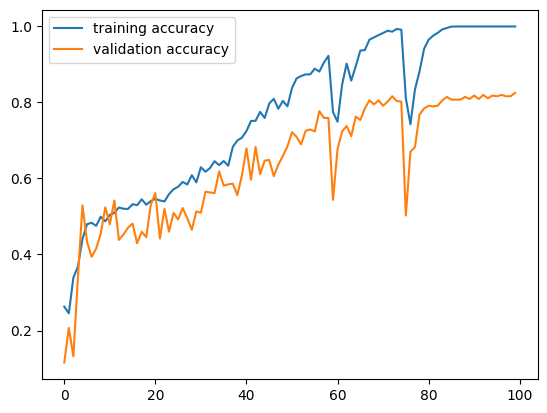

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

In [ ]:
train_prediciton = model.predict(trainX)
test_prediction = model.predict(testX)
def transform_pred(arr):
   arr = np.argmax(arr, axis=1)
   arr = np.where(arr == 1, 3, arr)  # Temporarily change 1s to 0
   arr = np.where(arr == 2, 1, arr)  # Change 2s to 1s
   arr = np.where(arr == 3, 2, arr)
   return arr
train_prediciton = transform_pred(train_prediciton)
test_prediction = transform_pred(test_prediction)
open = df_test.Open.iloc[look_back:].copy()
true_signals_train = df_train["Major_Reversal_Type_Open"].iloc[look_back:]
true_signals_test = df_test["Major_Reversal_Type_Open"].iloc[look_back:]
evaluate(true_signals_train,true_signals_test,train_prediciton ,test_prediction, open)

18/18 [==============================] - 0s 4ms/step
ML-based evaluation 

Train Data

              precision    recall  f1-score   support

        Hold       1.00      1.00      1.00      2033
         Buy       0.00      0.00      0.00       150
        Sell       0.00      0.00      0.00       150

    accuracy                           0.87      2333
   macro avg       0.33      0.33      0.33      2333
weighted avg       0.87      0.87      0.87      2333

Test Data

              precision    recall  f1-score   support

        Hold       0.90      0.91      0.90       498
         Buy       0.03      0.03      0.03        32
        Sell       0.00      0.00      0.00        31

    accuracy                           0.81       561
   macro avg       0.31      0.31      0.31       561
weighted avg       0.80      0.81      0.80       561


--------------------------------------------------

Financial-based evaluation 

Backtest Duration: 11 days, 2:10:00

Profitability 

Simpl

In [ ]:
plot_signals(true_signals_test,test_prediction,df_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler

def oversample(X, y):
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    return X_resampled, y_resampled

def train_NN(X_train,y_train):
  n_classes = y_train.nunique()
  if n_classes < 6:
    if n_classes == 2:
      n_classes = 1
      activation = "sigmoid"
      loss = "binary_crossentropy"
      metric = "accuracy"
    elif n_classes > 2:
      # X_train,y_train  = oversample(X_train,y_train)
      y_train = to_categorical(y_train, n_classes)
      activation = "softmax"
      loss = "categorical_crossentropy"
      metric = "accuracy"
  else:
    activation = "linear"
    loss = "mean_squared_error"
    n_classes = 1
    metric = "mae"
  model = Sequential()
  model.add(Dense(30, input_dim=X_train.shape[1]))
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dense(30))
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dense(100))
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dense(30))
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dense(30))
  model.add(LeakyReLU(alpha=0.05))
  model.add(Dense(n_classes, activation=activation))
  model.compile(loss=loss, optimizer='adam', metrics=[metric])
  early_stopping = EarlyStopping(monitor='loss', patience=5)
  model.fit(X_train, y_train, epochs=250, batch_size=32,callbacks = [early_stopping],verbose = 0)
  return model


def train_XGboost(X_train, y_train, bagging = False):
    n_classes = y_train.nunique()
    if n_classes < 6:
        label_encoder = LabelEncoder()
        y_train = label_encoder.fit_transform(y_train)
        if n_classes == 2:
            objective = 'binary:logistic'
            eval_metric = 'logloss'
        else:
            objective = 'multi:softprob'
            eval_metric = 'mlogloss'
    else:
        objective = 'reg:squarederror'
        eval_metric = 'rmse'

    dtrain = xgb.DMatrix(X_train, label=y_train)
    params = {
        'max_depth': 0,
        'eta': 0.5,
        'gamma': 3,
        'min_child_weight': 0.2,
        'subsample': 1,
        'colsample_bytree': 1,
        'lambda': 0.1,
        'alpha': 0.1,
        'objective' : objective,
        'eval_metric': eval_metric,
        'seed': 53,
        'tree_method' : "hist",
        'device' : "cuda"
    }
    if bagging == True:
      params['subsample'] = 0.8
      params['colsample_bytree'] = 0.8
    if n_classes < 6:
      params['num_class'] = n_classes if n_classes > 2 else 1
    model = xgb.train(params, dtrain, 1000)
    return model

def train_random_forest(X_train, y_train):
    n_classes = y_train.nunique()
    if n_classes < 6:
        model = RandomForestClassifier(n_estimators=100)
    else:
        model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)
    return model

def train_lightgbm(X_train, y_train):
    n_classes = y_train.nunique()
    if n_classes < 6:
        label_encoder = LabelEncoder()
        y_train = label_encoder.fit_transform(y_train)
        if n_classes == 2:
            params = {
                'objective': 'binary',
                'metric': 'binary_error',
            }
        else:
            params = {
                'objective': 'multiclass',
                'metric': 'multi_error',
                'num_class': n_classes,
            }
        dtrain = lgb.Dataset(X_train, label=y_train)
        model = lgb.train(params, dtrain, 100)
    else:
        params = {
            'objective': 'regression',
            'metric': 'mse',
        }
        dtrain = lgb.Dataset(X_train, label=y_train)
        model = lgb.train(params, dtrain, 100)

    return model

def predict_lightgbm(model, X_test):
    predictions = model.predict(X_test)
    return predictions

def predict_random_forest(model, X_test):
    if isinstance(model, RandomForestRegressor):
        predictions = model.predict(X_test)
    elif isinstance(model, RandomForestClassifier):
        predictions = model.predict_proba(X_test)
    if len(predictions.shape) > 1 and predictions.shape[1] == 2:
        predictions = np.max(predictions, axis=1)
    return predictions

def predict_XGboost(model, X_test):
  dtest = xgb.DMatrix(X_test)
  preds = model.predict(dtest)
  return preds

def predict_NN(model, X_test):
  output_layer = model.layers[-1]
  activation_function = output_layer.get_config()['activation']
  if activation_function == 'linear' or activation_function is None:
    predictions = model.predict(X_test)
  elif activation_function == 'sigmoid':
    predictions = model.predict(X_test)
  elif activation_function == 'softmax':
    predictions = model.predict(X_test)
  return predictions

In [ ]:
from sklearn.model_selection import train_test_split

domain_1_df = new_df_apple_stocks_5_min.copy()
domain_2_df = new_apple_stocks_daily.copy()

features = domain_1_df.columns[:-13]
labels = domain_1_df.columns[-13:]

def scale(df):
  continuous_cols = [col for col in features if df[col].nunique() > 5]
  range = (df.High - df.Low).rolling(14).mean()
  df[continuous_cols] = df[continuous_cols].div(range, axis=0)
  df = df.dropna()
  return df

# domain_1_df = scale(domain_1_df)
# domain_2_df = scale(domain_2_df)

df_train,df_test = train_test_split(domain_1_df, test_size=0.2, shuffle = False)
# df_train = pd.concat([domain_2_df,df_train])
df_train_base,df_train_meta = train_test_split(df_train, test_size=0.4, shuffle = False)

X_train_base = df_train_base[features]

models = {}
for label in labels:
    y_train_base = df_train_base[label]
    NN = train_NN(X_train_base,y_train_base)
    XGboost_bagging = train_XGboost(X_train_base,y_train_base,bagging = True)
    XGboost = train_XGboost(X_train_base,y_train_base)
    random_forest = train_random_forest(X_train_base,y_train_base)
    lightgbm = train_lightgbm(X_train_base,y_train_base)
    models[label] = {"XGboost_bagging":XGboost_bagging,"XGboost":XGboost,"random_forest":random_forest,"lightgbm":lightgbm}

In [ ]:
X_test = df_test[features]
X_train_meta = df_train_meta[features]
meta_X_train = pd.DataFrame()
meta_X_test = pd.DataFrame()
meta_y_train = df_train_meta["Major_Reversal_Type_Open"]
meta_y_test = df_test["Major_Reversal_Type_Open"]
for label in models:
    train_preds = []
    test_preds = []
    for model_name in models[label]:
        model = models[label][model_name]
        model_name = model_name.replace("_bagging","")
        train_pred = globals()[f'predict_{model_name}'](model,X_train_meta)
        test_pred = globals()[f'predict_{model_name}'](model,X_test)
        column_name = f"{label}_{model_name}"
        if not(len(train_pred.shape) > 1 and train_pred.shape[1] > 1):
          train_pred = train_pred.reshape(-1)
          test_pred = test_pred.reshape(-1)
          meta_X_train[column_name] = list(train_pred)
          meta_X_test[column_name] = list(test_pred)
        else:
          for i in range(3):
                train_col_name = f"{column_name}_{i+1}"
                test_col_name = f"{column_name}_{i+1}"
                meta_X_train[train_col_name] = train_pred[:, i]
                meta_X_test[test_col_name] = test_pred[:, i]

meta_model = train_XGboost(meta_X_train, meta_y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[08:42:10] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



In [ ]:
train_prediciton = predict_XGboost(meta_model,meta_X_train)
test_prediction = predict_XGboost(meta_model,meta_X_test)
def transform_pred(arr):
   arr = np.argmax(arr, axis=1)
  #  arr = np.where(arr == 0, -1, np.where(arr == 1, 0, np.where(arr == 2, 1, arr)))
   return arr
train_prediciton = transform_pred(train_prediciton)
test_prediction = transform_pred(test_prediction)
open = df_test.Open.copy()
evaluate(meta_y_train,meta_y_test,train_prediciton ,test_prediction, open)

ML-based evaluation 

Train Data

              precision    recall  f1-score   support

        Hold       0.96      1.00      0.98       828
         Buy       0.97      0.66      0.79        59
        Sell       1.00      0.75      0.85        59

    accuracy                           0.96       946
   macro avg       0.98      0.80      0.87       946
weighted avg       0.96      0.96      0.96       946

Test Data

              precision    recall  f1-score   support

        Hold       0.90      0.95      0.92       525
         Buy       0.38      0.18      0.24        33
        Sell       0.12      0.06      0.08        33

    accuracy                           0.86       591
   macro avg       0.46      0.40      0.42       591
weighted avg       0.82      0.86      0.84       591


--------------------------------------------------

Financial-based evaluation 

Backtest Duration: 11 days, 4:40:00

Profitability 

Simple/Compound Return: 0.006266290619733572 / 0.006244110

In [ ]:
plot_signals(meta_y_test,test_prediction,df_test)

In [ ]:
df = new_df_apple_stocks_5_min
df_train,df_test = train_test_split(df, test_size=0.2, shuffle = False)
features = df.columns[:-13]
label = df.columns[-12]
X_train = df_train[features]
y_train = df_train[label]
X_test = df_test[features]
y_test = df_test[label]

meta_model = train_XGboost(X_train,y_train)
train_prediciton = predict_XGboost(meta_model,X_train)
test_prediction = predict_XGboost(meta_model,X_test)
def transform_pred(arr):
   arr = np.argmax(arr, axis=1)
   arr = np.where(arr == 0, -1, np.where(arr == 1, 0, np.where(arr == 2, 1, arr)))
   return arr
train_prediciton = transform_pred(train_prediciton)
test_prediction = transform_pred(test_prediction)
open = df_test.Open.copy()
evaluate(y_train,y_test,train_prediciton ,test_prediction, open)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:45:16] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


ML-based evaluation 

Train Data

              precision    recall  f1-score   support

         Buy       0.98      0.59      0.73       147
        Hold       0.95      1.00      0.97      2071
        Sell       0.95      0.68      0.80       148

    accuracy                           0.95      2366
   macro avg       0.96      0.75      0.83      2366
weighted avg       0.95      0.95      0.95      2366

Test Data

              precision    recall  f1-score   support

         Buy       0.24      0.13      0.17        39
        Hold       0.89      0.95      0.92       515
        Sell       0.53      0.26      0.35        38

    accuracy                           0.85       592
   macro avg       0.55      0.45      0.48       592
weighted avg       0.82      0.85      0.83       592


--------------------------------------------------

Financial-based evaluation 

Backtest Duration: 11 days 03:45:00

Profitability 

Simple/Compound Return: 0.008607234460750563 / 0.008621105